In [1]:
import pandas as pd
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
%matplotlib inline
import pickle

In [3]:
testData = pd.read_csv('/content/gdrive/MyDrive/ML_Project/Dataset/test.csv')
trainData = pd.read_csv('/content/gdrive/MyDrive/ML_Project/Dataset/train.csv')
validData = pd.read_csv('/content/gdrive/MyDrive/ML_Project/Dataset/val.csv')

# Six Buckets

In [4]:
train_data_target_6k=pd.read_csv('/content/gdrive/MyDrive/ML_Project/Dataset/train_6_buckets.csv')
test_data_target_6k=pd.read_csv('/content/gdrive/MyDrive/ML_Project/Dataset/test_6_buckets.csv')
val_data_target_6k=pd.read_csv('/content/gdrive/MyDrive/ML_Project/Dataset/valid_6_buckets.csv')
testData['data_IMDBscore']=test_data_target_6k['data_IMDBscore']
trainData['data_IMDBscore']=train_data_target_6k['data_IMDBscore']
validData ['data_IMDBscore']=val_data_target_6k['data_IMDBscore']
train_X = trainData.drop(columns=['data_IMDBscore'])
train_Y = trainData['data_IMDBscore']
test_X = testData.drop(columns=['data_IMDBscore'])
test_Y = testData['data_IMDBscore']
val_X=validData.drop(columns=['data_IMDBscore'])
val_Y=validData['data_IMDBscore']

Minimum error:- 0.40789473684210525 at K = 18


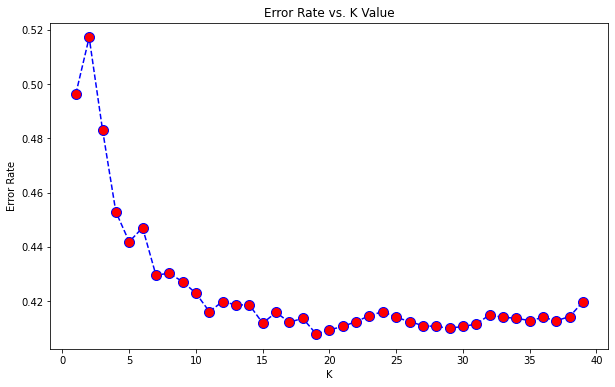

In [5]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(train_X,train_Y)
 pred_i = knn.predict(test_X)
 error_rate.append(np.mean(pred_i != test_Y))

 filename = '/content/gdrive/MyDrive/SavedModels/knn_6_'+str(i)
 filename=filename+".sav"
 pickle.dump(knn, open(filename, 'wb'))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))


In [6]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
neigh = KNeighborsClassifier(n_neighbors = 18).fit(train_X,train_Y)
trainpred = neigh.predict(train_X)
valpred = neigh.predict(val_X)
testpred = neigh.predict(test_X)
train_f1_score = f1_score(train_Y, trainpred, average='weighted')
train_precision_score = precision_score(train_Y, trainpred, average='weighted')
train_recall_score = recall_score(train_Y, trainpred, average='weighted')
train_accuracy_score = accuracy_score(train_Y, trainpred, normalize=True)
print("train_f1_score "+str(train_f1_score) )
print("train_precision_score "+str(train_precision_score))
print("train_recall_score "+str(train_recall_score))
print("train_accuracy_score "+str(train_accuracy_score))
val_f1_score = f1_score(val_Y, valpred, average='weighted')
val_precision_score = precision_score(val_Y, valpred, average='weighted')
val_recall_score = recall_score(val_Y, valpred, average='weighted')
val_accuracy_score = accuracy_score(val_Y, valpred, normalize=True)
print("val_f1_score "+str(val_f1_score) )
print("val_precision_score "+str(val_precision_score))
print("val_recall_score "+str(val_recall_score))
print("val_accuracy_score "+str(val_accuracy_score))
test_f1_score = f1_score(test_Y, testpred, average='weighted')
test_precision_score = precision_score(test_Y, testpred, average='weighted')
test_recall_score = recall_score(test_Y, testpred, average='weighted')
test_accuracy_score = accuracy_score(test_Y, testpred, normalize=True)
print("test_f1_score "+str(test_f1_score) )
print("test_precision_score "+str(test_precision_score))
print("test_recall_score "+str(test_recall_score))
print("test_accuracy_score "+str(test_accuracy_score))

train_f1_score 0.5562357630502714
train_precision_score 0.6498397403276763
train_recall_score 0.6157932708073719
train_accuracy_score 0.6157932708073719
val_f1_score 0.5223750655324567
val_precision_score 0.5892784493471682
val_recall_score 0.5913682277318641
val_accuracy_score 0.5913682277318641
test_f1_score 0.5227045690579305
test_precision_score 0.5741381549889781
test_recall_score 0.5862913096695227
test_accuracy_score 0.5862913096695227


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Eleven Buckets

In [7]:
train_data_target_11k=pd.read_csv('/content/gdrive/MyDrive/ML_Project/Dataset/train_11_buckets.csv')
test_data_target_11k=pd.read_csv('/content/gdrive/MyDrive/ML_Project/Dataset/test_11_buckets.csv')
val_data_target_11k=pd.read_csv('/content/gdrive/MyDrive/ML_Project/Dataset/valid_11_buckets.csv')
testData['data_IMDBscore']=test_data_target_11k['data_IMDBscore']
trainData['data_IMDBscore']=train_data_target_11k['data_IMDBscore']
validData ['data_IMDBscore']=val_data_target_11k['data_IMDBscore']
train_X = trainData.drop(columns=['data_IMDBscore'])
train_Y = trainData['data_IMDBscore']
test_X = testData.drop(columns=['data_IMDBscore'])
test_Y = testData['data_IMDBscore']
val_X=validData.drop(columns=['data_IMDBscore'])
val_Y=validData['data_IMDBscore']

Minimum error:- 0.5942472460220318 at K = 38


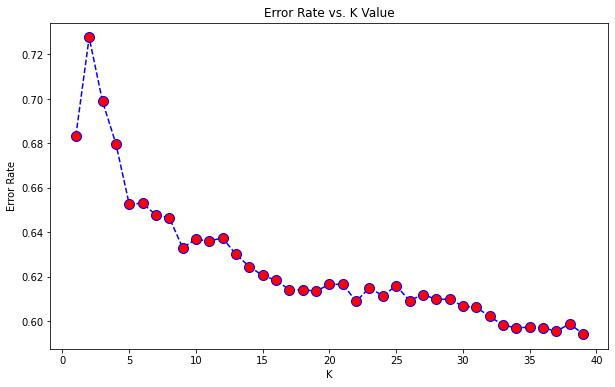

In [8]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(train_X,train_Y)
 pred_i = knn.predict(test_X)
 error_rate.append(np.mean(pred_i != test_Y))
 filename = '/content/gdrive/MyDrive/SavedModels/knn_11_'+str(i)
 filename=filename+".sav"
 pickle.dump(knn, open(filename, 'wb'))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))


In [9]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
neigh = KNeighborsClassifier(n_neighbors = 38).fit(train_X,train_Y)
trainpred = neigh.predict(train_X)
valpred = neigh.predict(val_X)
testpred = neigh.predict(test_X)
train_f1_score = f1_score(train_Y, trainpred, average='weighted')
train_precision_score = precision_score(train_Y, trainpred, average='weighted')
train_recall_score = recall_score(train_Y, trainpred, average='weighted')
train_accuracy_score = accuracy_score(train_Y, trainpred, normalize=True)
print("train_f1_score "+str(train_f1_score) )
print("train_precision_score "+str(train_precision_score))
print("train_recall_score "+str(train_recall_score))
print("train_accuracy_score "+str(train_accuracy_score))
val_f1_score = f1_score(val_Y, valpred, average='weighted')
val_precision_score = precision_score(val_Y, valpred, average='weighted')
val_recall_score = recall_score(val_Y, valpred, average='weighted')
val_accuracy_score = accuracy_score(val_Y, valpred, normalize=True)
print("val_f1_score "+str(val_f1_score) )
print("val_precision_score "+str(val_precision_score))
print("val_recall_score "+str(val_recall_score))
print("val_accuracy_score "+str(val_accuracy_score))
test_f1_score = f1_score(test_Y, testpred, average='weighted')
test_precision_score = precision_score(test_Y, testpred, average='weighted')
test_recall_score = recall_score(test_Y, testpred, average='weighted')
test_accuracy_score = accuracy_score(test_Y, testpred, normalize=True)
print("test_f1_score "+str(test_f1_score) )
print("test_precision_score "+str(test_precision_score))
print("test_recall_score "+str(test_recall_score))
print("test_accuracy_score "+str(test_accuracy_score))

train_f1_score 0.3949564506527788
train_precision_score 0.4502407366837077
train_recall_score 0.45936905620777857
train_accuracy_score 0.45936905620777857
val_f1_score 0.3300239676879015
val_precision_score 0.3515175716806479
val_recall_score 0.39302112029384756
val_accuracy_score 0.39302112029384756
test_f1_score 0.33562795413219393
test_precision_score 0.3582218038588035
test_recall_score 0.4011627906976744
test_accuracy_score 0.4011627906976744


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Twenty One Bucket

In [10]:
train_data_target_21k=pd.read_csv('/content/gdrive/MyDrive/ML_Project/Dataset/train_21_buckets.csv')
test_data_target_21k=pd.read_csv('/content/gdrive/MyDrive/ML_Project/Dataset/test_21_buckets.csv')
val_data_target_21k=pd.read_csv('/content/gdrive/MyDrive/ML_Project/Dataset/valid_21_buckets.csv')
testData['data_IMDBscore']=test_data_target_21k['data_IMDBscore']
trainData['data_IMDBscore']=train_data_target_21k['data_IMDBscore']
validData ['data_IMDBscore']=val_data_target_21k['data_IMDBscore']
train_X = trainData.drop(columns=['data_IMDBscore'])
train_Y = trainData['data_IMDBscore']*2
test_X = testData.drop(columns=['data_IMDBscore'])
test_Y = testData['data_IMDBscore']*2
val_X=validData.drop(columns=['data_IMDBscore'])
val_Y=validData['data_IMDBscore']*2

Minimum error:- 0.7836597307221542 at K = 29


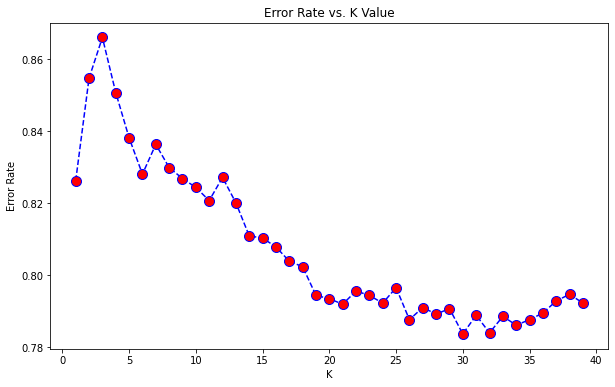

In [11]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(train_X,train_Y)
 pred_i = knn.predict(test_X)
 error_rate.append(np.mean(pred_i != test_Y))
 filename = '/content/gdrive/MyDrive/SavedModels/knn_21_'+str(i)
 filename=filename+".sav"
 pickle.dump(knn, open(filename, 'wb'))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))


In [12]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
neigh = KNeighborsClassifier(n_neighbors = 29).fit(train_X,train_Y)
trainpred = neigh.predict(train_X)
valpred = neigh.predict(val_X)
testpred = neigh.predict(test_X)
train_f1_score = f1_score(train_Y, trainpred, average='weighted')
train_precision_score = precision_score(train_Y, trainpred, average='weighted')
train_recall_score = recall_score(train_Y, trainpred, average='weighted')
train_accuracy_score = accuracy_score(train_Y, trainpred, normalize=True)
print("train_f1_score "+str(train_f1_score) )
print("train_precision_score "+str(train_precision_score))
print("train_recall_score "+str(train_recall_score))
print("train_accuracy_score "+str(train_accuracy_score))
val_f1_score = f1_score(val_Y, valpred, average='weighted')
val_precision_score = precision_score(val_Y, valpred, average='weighted')
val_recall_score = recall_score(val_Y, valpred, average='weighted')
val_accuracy_score = accuracy_score(val_Y, valpred, normalize=True)
print("val_f1_score "+str(val_f1_score) )
print("val_precision_score "+str(val_precision_score))
print("val_recall_score "+str(val_recall_score))
print("val_accuracy_score "+str(val_accuracy_score))
test_f1_score = f1_score(test_Y, testpred, average='weighted')
test_precision_score = precision_score(test_Y, testpred, average='weighted')
test_recall_score = recall_score(test_Y, testpred, average='weighted')
test_accuracy_score = accuracy_score(test_Y, testpred, normalize=True)
print("test_f1_score "+str(test_f1_score) )
print("test_precision_score "+str(test_precision_score))
print("test_recall_score "+str(test_recall_score))
print("test_accuracy_score "+str(test_accuracy_score))

train_f1_score 0.26013148697613037
train_precision_score 0.30782125113404096
train_recall_score 0.29199186725257426
train_accuracy_score 0.29199186725257426
val_f1_score 0.1812899958286061
val_precision_score 0.21662350676667377
val_recall_score 0.20752984389348025
val_accuracy_score 0.20752984389348025
test_f1_score 0.18097799408737691
test_precision_score 0.19689708777750897
test_recall_score 0.20930232558139536
test_accuracy_score 0.20930232558139536


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
